In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [ ]:
df = pd.read_csv('Airbnb_data - airbnb_data.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

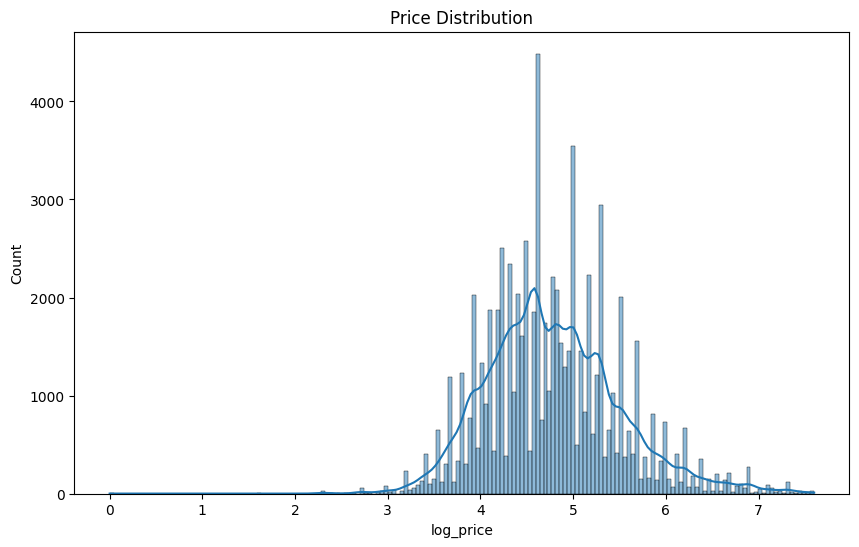

In [ ]:
# Plot target distribution
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], kde=True)
plt.title('Price Distribution')
plt.show()


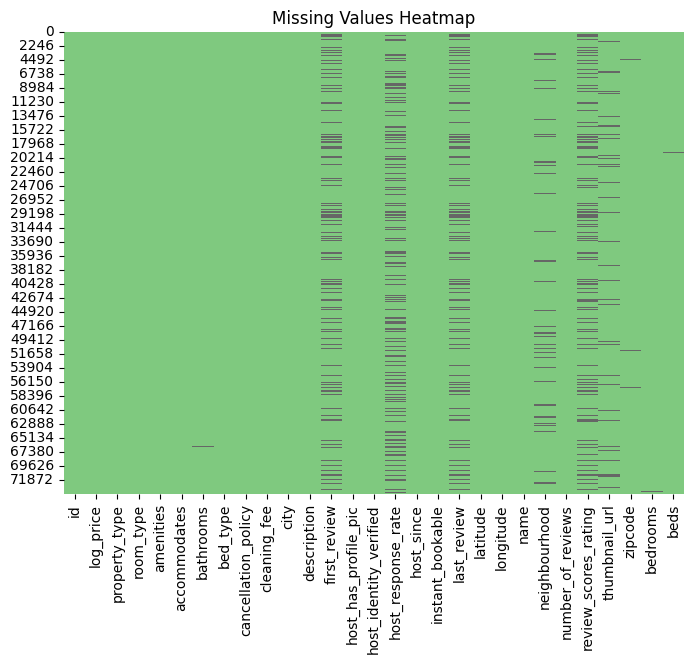

In [ ]:
# Missing values analysis
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Accent')
plt.title('Missing Values Heatmap')
plt.show()



In [ ]:
df['amenities_count'] = df['amenities'].str.findall(r"'([^']*)'").str.len()
# Date features
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_experience'] = (pd.to_datetime('today') - df['host_since']).dt.days

# Categorical encoding
cat_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Numerical features
num_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                'number_of_reviews', 'review_scores_rating', 'amenities_count']


<ipython-input-16-c0f547489d08>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['host_since'] = pd.to_datetime(df['host_since'])


In [ ]:
# Handle missing values
df[num_features] = df[num_features].fillna(df[num_features].median())
df = df.dropna(subset=['log_price'])

# Feature selection
X = df.drop(columns=['log_price', 'id', 'amenities', 'description', 'host_since',
                    'first_review', 'last_review', 'name', 'thumbnail_url'])
y = df['log_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Scale numerical features
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[num_features])

# Transform the test data
X_test_scaled = scaler.transform(X_test[num_features])

# Convert scaled arrays back to DataFrames
X_train[num_features] = pd.DataFrame(X_train_scaled, columns=num_features, index=X_train.index)
X_test[num_features] = pd.DataFrame(X_test_scaled, columns=num_features, index=X_test.index)

# Train the XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=10,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'\nRMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

In [ ]:
# Feature Importance
plt.figure(figsize=(12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importance')
plt.show()


top_features = feat_importances.nlargest(5).index.tolist()

# Correlation with price
corr_matrix = df[['log_price'] + top_features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Amenities Impact Analysis
amenities_analysis = df.groupby('amenities_count')['log_price'].mean()
plt.figure(figsize=(10,6))
amenities_analysis.plot(kind='bar')
plt.title('Average Price by Amenities Count')
plt.xlabel('Number of Amenities')
plt.ylabel('Average Price')
plt.show()

**Drive Link --> https://drive.google.com/drive/folders/18PsLWCgQqlQdA7gIhL_4xa9Bk3fPX52W?usp=sharing**